In [105]:
import pandas as pd 

In [106]:
#temp = pd.read_csv("temp.csv")   # datetime  35064 non-null  object --> object znaczy ze zostało jako strng zaczytane
temp = pd.read_csv("temp.csv", parse_dates= ["datetime"], index_col = "datetime")

In [107]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [108]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [109]:
temp.iloc[0,0]

11.7

In [110]:
temp.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [111]:
temp.index[0]

Timestamp('2013-01-01 00:00:00')

### Converting strings to datetime objects with pd.to_datetime()

In [112]:
temp = pd.read_csv("temp.csv")

In [113]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


In [114]:
temp.datetime  # OBJECT wiec string

0        2013-01-01 00:00:00
1        2013-01-01 01:00:00
2        2013-01-01 02:00:00
3        2013-01-01 03:00:00
4        2013-01-01 04:00:00
                ...         
35059    2016-12-31 19:00:00
35060    2016-12-31 20:00:00
35061    2016-12-31 21:00:00
35062    2016-12-31 22:00:00
35063    2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: object

In [115]:
pd.to_datetime(temp.datetime)

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
35059   2016-12-31 19:00:00
35060   2016-12-31 20:00:00
35061   2016-12-31 21:00:00
35062   2016-12-31 22:00:00
35063   2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [116]:
temp = temp.set_index(pd.to_datetime(temp.datetime)).drop(columns= "datetime")
temp

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


### Initial Analysis / Visual Inspection of Time Series


In [117]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [118]:
temp.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


In [119]:
temp.LA.value_counts()

 16.2    238
 16.7    237
 15.2    234
 18.2    231
 16.6    228
        ... 
-5.9       1
-6.5       1
-6.6       1
-2.2       1
-3.3       1
Name: LA, Length: 442, dtype: int64

In [120]:
import matplotlib.pyplot as plt 

In [121]:
plt.rcdefaults()

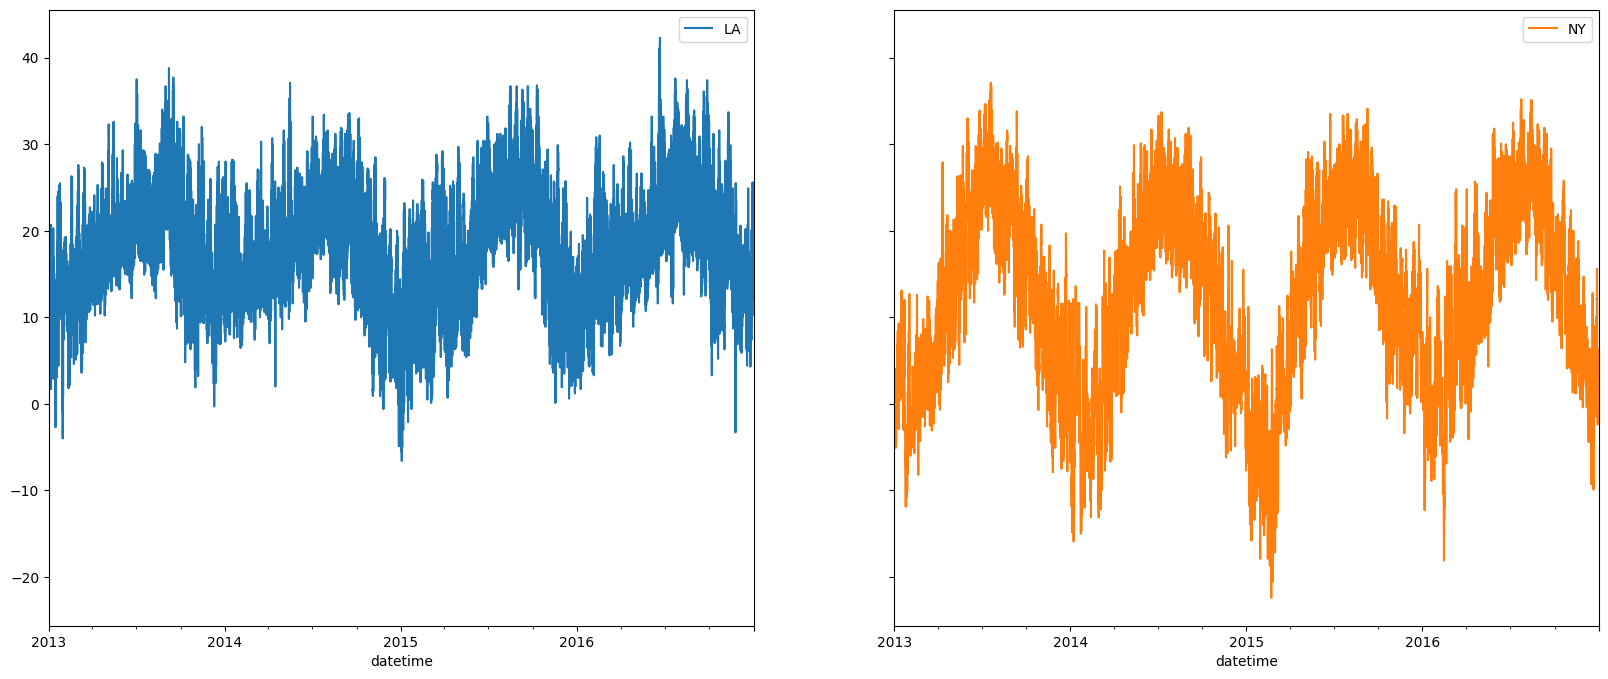

In [122]:
temp.plot(figsize= (20,8), subplots= True, layout= (1, 2), sharey= True)
plt.show()

### Indexing and Slicing Time Series


In [123]:
temp.loc["2015"]  # <- cąły rok 2015

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [124]:
temp.loc[["2015-01-01 02:00:00", "2015-12-31 22:00:00"]]

,LA,NY
datetime,,
2015-01-01 02:00:00,3.2,-6.0
2015-12-31 22:00:00,16.6,7.2


### Creating a customized DatetimeIndex with pd.date_range()

In [125]:
pd.date_range(start = "2015-07-01", end = "2015-07-31", freq='D')

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

Podając ilośc dni od daty startowej lub końcowej

In [126]:
pd.date_range(start = "2015-07-01", periods = 31, freq='D')

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [127]:
pd.date_range(start= "2015-07-09", periods = 4, freq= "W")  # freq='W-SUN' --> PANDAS zawsze liczy pełne tygodnie od niedzieli

DatetimeIndex(['2015-07-12', '2015-07-19', '2015-07-26', '2015-08-02'], dtype='datetime64[ns]', freq='W-SUN')

In [128]:
pd.date_range(start= "2015-07-09", periods = 4, freq= pd.DateOffset(years = 1))

DatetimeIndex(['2015-07-09', '2016-07-09', '2017-07-09', '2018-07-09'], dtype='datetime64[ns]', freq='<DateOffset: years=1>')

### Downsampling Time Series with resample() (Part 1)

In [129]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [130]:
temp.resample("W")  # Tworzy obiek podobny do GROUPBY obiektu

In [131]:
list(temp.resample("W"))[0][1]

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2013-01-06 19:00:00,15.4,6.8
2013-01-06 20:00:00,16.8,6.9
2013-01-06 21:00:00,17.2,5.1


In [132]:
temp.resample("w").first()

,LA,NY
datetime,,
2013-01-06,11.7,-1.1
2013-01-13,14.0,0.6
2013-01-20,10.8,7.0
2013-01-27,16.1,7.0
2013-02-03,16.4,-5.1
...,...,...
2016-12-04,15.7,6.7
2016-12-11,19.9,3.7
2016-12-18,17.3,-1.4


In [133]:
temp.resample("M").mean().round(2).head()  # Średnie dla MIESICEY

,LA,NY
datetime,,
2013-01-31,11.60,1.13
2013-02-28,12.59,0.62
2013-03-31,15.07,3.72
2013-04-30,16.49,10.70
2013-05-31,19.01,15.82


In [134]:
temp.resample("MS").mean().head() ## loffset was depriciated


,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328


In [135]:
# new
from pandas.tseries.frequencies import to_offset
df2 = temp.resample("MS").mean()
df2.index = df2.index + to_offset("14D")
df2.head()

,LA,NY
datetime,,
2013-01-15,11.596237,1.129570
2013-02-15,12.587202,0.617857
2013-03-15,15.069946,3.719220
2013-04-15,16.487361,10.699306
2013-05-15,19.005780,15.824328


In [136]:
temp.resample("M", kind= "period").mean().head() # kind = "period" zmieni index

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328


In [137]:
temp_m = temp.resample("M", kind = "period").mean()
temp_m.head()

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328


In [138]:
temp_m.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2013-01 to 2016-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      48 non-null     float64
 1   NY      48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [139]:
temp_m.index

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'],
            dtype='period[M]', name='datetime')

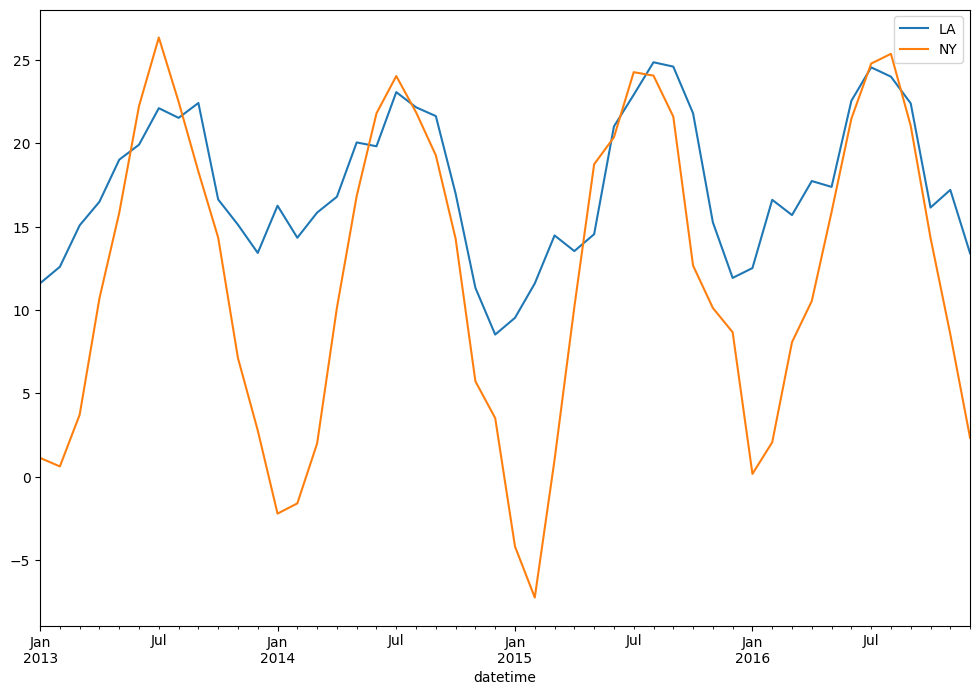

In [140]:
temp_m.plot(figsize=(12,8))
#temp.plot(figsize=(12,8))
plt.show()

### Period index OBJCET

In [141]:
 temp_m.head(12)

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [142]:
temp_m.index

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'],
            dtype='period[M]', name='datetime')

In [143]:
temp_m.loc["2013-2"]

LA    12.587202
NY     0.617857
Name: 2013-02, dtype: float64

In [144]:
temp_m.loc["2013-2" : "2013-5"]

,LA,NY
datetime,,
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328


In [145]:
temp_m.info() # --> PeriodIndex: 48 entries, 2013-01 to 2016-12

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2013-01 to 2016-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      48 non-null     float64
 1   NY      48 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [146]:
temp_m.to_timestamp(how= "start").head(12)

,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328
2013-06-01,19.905417,22.225694
2013-07-01,22.093952,26.329704
2013-08-01,21.513172,22.480376
2013-09-01,22.404861,18.291806


In [147]:
temp_m.to_timestamp(how= "start").info() # --> DatetimeIndex: 48 entries, 2013-01-01 to 2016-12-01

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-01-01 to 2016-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      48 non-null     float64
 1   NY      48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


### Advnaced sampling

In [148]:
# Temperatura w świeta
birthd = pd.date_range(end = "2018-12-24", periods= 10, freq = pd.DateOffset(years= 1))  # Bedz
birthd

DatetimeIndex(['2009-12-24', '2010-12-24', '2011-12-24', '2012-12-24',
               '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-24',
               '2017-12-24', '2018-12-24'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [149]:
temp_d = temp.resample("D").mean()
temp_d

,LA,NY
datetime,,
2013-01-01,8.858333,-0.404167
2013-01-02,9.283333,3.208333
2013-01-03,10.304167,-2.425000
2013-01-04,11.512500,-2.070833
2013-01-05,11.083333,0.816667
...,...,...
2016-12-27,12.154167,10.579167
2016-12-28,14.433333,4.016667
2016-12-29,16.045833,1.312500


In [150]:
temp_d.loc[birthd]

KeyError: "[Timestamp('2009-12-24 00:00:00'), Timestamp('2010-12-24 00:00:00'), Timestamp('2011-12-24 00:00:00'), Timestamp('2012-12-24 00:00:00'), Timestamp('2017-12-24 00:00:00'), Timestamp('2018-12-24 00:00:00')] not in index"

In [151]:
temp_d.reindex(birthd, method= "bfill")

,LA,NY
2009-12-24,8.858333,-0.404167
2010-12-24,8.858333,-0.404167
2011-12-24,8.858333,-0.404167
2012-12-24,8.858333,-0.404167
2013-12-24,16.158333,3.487500
2014-12-24,10.712500,8.045833
2015-12-24,10.716667,17.462500
2016-12-24,11.820833,4.045833
2017-12-24,NaN,NaN
2018-12-24,NaN,NaN


In [152]:
temp_d.head() # DLATEGO WARTOSC ' 8.858333  ` wypełniło, tak gdzie out of scope

,LA,NY
datetime,,
2013-01-01,8.858333,-0.404167
2013-01-02,9.283333,3.208333
2013-01-03,10.304167,-2.425000
2013-01-04,11.512500,-2.070833
2013-01-05,11.083333,0.816667


# pip install yfinance

# ADVANCED multiindexing, reading, saving, swaplevels

In [154]:
# pip install yfinance

In [155]:
import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf 


In [158]:
ticker = ["AAPL", "BA", "KO", "IBM", "DIS", "MSFT"] # Nazwa frimy posiadajacej akcje na giełdzie

In [159]:
yf.download("AAPL", start= "2010-01-01", end= "2019-02-06")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434671,447610800
...,...,...,...,...,...,...
2019-01-30,40.812500,41.537498,40.057499,41.312500,39.758041,244439200
2019-01-31,41.527500,42.250000,41.139999,41.610001,40.044346,162958400
2019-02-01,41.740002,42.244999,41.482498,41.630001,40.063591,130672400


In [162]:
stocks = yf.download(ticker, start= "2010-01-01", end= "2019-02-06")
stocks.head()

[*********************100%***********************]  6 of 6 completed


Adj Close                                                         \
                AAPL         BA        DIS        IBM         KO       MSFT   
Date                                                                          
2010-01-04  6.496297  43.777550  27.933918  79.247482  18.793240  23.572371   
2010-01-05  6.507526  45.211342  27.864241  78.290115  18.565905  23.579987   
2010-01-06  6.404014  46.582794  27.716164  77.781578  18.559315  23.435276   
2010-01-07  6.392177  48.468559  27.724876  77.512337  18.513182  23.191555   
2010-01-08  6.434673  48.001011  27.768427  78.290115  18.170528  23.351498   

               Close                                    ...   Open  \
                AAPL         BA        DIS         IBM  ...    DIS   
Date                                                    ...          
2010-01-04  7.643214  56.180000  32.070000  126.625237  ...  32.50   
2010-01-05  7.656429  58.020000  31.990000  125.095604  ...  32.07   
2010-01-06  7.534643  59.779999  31.820000  124.282982  ...  31.90   
2010-01-07  7.520714  62.200001  31.830000  123.852776  ...  31.77   
2010-01-08  7.570714  61.599998  31.879999  125.095604  ...  31.66   

                                                 Volume                      \
                   IBM         KO       MSFT       AAPL        BA       DIS   
Date                                                                          
2010-01-04  125.411087  28.580000  30.620001  493729600   6186700  13700400   
2010-01-05  125.889099  28.424999  30.850000  601904800   8867800  10307700   
2010-01-06  124.933075  28.174999  30.879999  552160000   8836500  10709500   
2010-01-07  124.158699  28.165001  30.629999  477131200  14379100   8202100   
2010-01-08  123.393883  27.730000  30.280001  447610800   7146600   7657500   

                                         
                IBM        KO      MSFT  
Date                                     
2010-01-04  6438444  13870400  38409100  
2010-01-05  7156104  23172400  49749600  
2010-01-06  5863144  19264600  58182400  
2010-01-07  6109268  13234600  50559700  
2010-01-08  4390271  28712400  51197400  

[5 rows x 36 columns]

In [163]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2288 entries, 2010-01-04 to 2019-02-05
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2288 non-null   float64
 1   (Adj Close, BA)    2288 non-null   float64
 2   (Adj Close, DIS)   2288 non-null   float64
 3   (Adj Close, IBM)   2288 non-null   float64
 4   (Adj Close, KO)    2288 non-null   float64
 5   (Adj Close, MSFT)  2288 non-null   float64
 6   (Close, AAPL)      2288 non-null   float64
 7   (Close, BA)        2288 non-null   float64
 8   (Close, DIS)       2288 non-null   float64
 9   (Close, IBM)       2288 non-null   float64
 10  (Close, KO)        2288 non-null   float64
 11  (Close, MSFT)      2288 non-null   float64
 12  (High, AAPL)       2288 non-null   float64
 13  (High, BA)         2288 non-null   float64
 14  (High, DIS)        2288 non-null   float64
 15  (High, IBM)        2288 non-null   float64
 16  (High,

In [164]:
stocks.to_csv("stocks.csv")

In [166]:
pd.read_csv("stocks.csv") # Wygląda tak bo problem z importowaniem multiindexów

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Close,Close.1,Close.2,...,Open.2,Open.3,Open.4,Open.5,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5
0,NaN,AAPL,BA,DIS,IBM,KO,MSFT,AAPL,BA,DIS,...,DIS,IBM,KO,MSFT,AAPL,BA,DIS,IBM,KO,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,6.4962968826293945,43.777549743652344,27.933917999267578,79.24748229980469,18.79323959350586,23.572370529174805,7.643214225769043,56.18000030517578,32.06999969482422,...,32.5,125.41108703613281,28.579999923706055,30.6200008392334,493729600,6186700,13700400,6438444,13870400,38409100
3,2010-01-05,6.507526397705078,45.211341857910156,27.864240646362305,78.29011535644531,18.56590461730957,23.579986572265625,7.656428813934326,58.02000045776367,31.989999771118164,...,32.06999969482422,125.88909912109375,28.424999237060547,30.850000381469727,601904800,8867800,10307700,7156104,23172400,49749600
4,2010-01-06,6.4040141105651855,46.582794189453125,27.716163635253906,77.78157806396484,18.559314727783203,23.43527603149414,7.534643173217773,59.779998779296875,31.81999969482422,...,31.899999618530273,124.93307495117188,28.174999237060547,30.8799991607666,552160000,8836500,10709500,5863144,19264600,58182400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,2019-01-30,39.75804138183594,376.7463073730469,108.80033111572266,102.97547912597656,41.59638977050781,101.43748474121094,41.3125,387.7200012207031,110.12999725341797,...,110.30000305175781,128.10707092285156,47.25,104.62000274658203,244439200,12705300,7853800,4707941,12952500,49471900
2286,2019-01-31,40.04434585571289,374.70574951171875,110.17354583740234,103.00611877441406,41.8310546875,99.57809448242188,41.61000061035156,385.6199951171875,111.5199966430664,...,110.0999984741211,128.53729248046875,47.849998474121094,103.80000305175781,162958400,6878500,8351600,5108664,32181500,55636400
2287,2019-02-01,40.0635986328125,376.4644775390625,109.95620727539062,102.76091003417969,42.32646560668945,98.00475311279297,41.630001068115234,387.42999267578125,111.30000305175781,...,111.97000122070312,129.034423828125,48.47999954223633,103.77999877929688,130672400,5625700,6557700,3981076,19130100,35535700
2288,2019-02-04,41.201602935791016,385.763671875,110.4501724243164,103.59615325927734,42.80448913574219,100.82721710205078,42.8125,397.0,111.80000305175781,...,111.41000366210938,128.12619018554688,48.70000076293945,102.87000274658203,125982000,4256600,7037000,4149064,15105700,31315100


In [169]:
pd.read_csv("stocks.csv", header= [0,1]) # Teraz nie wczytało kolumny z datami jako indexy

Unnamed: 0_level_0  Adj Close                                      \
     Unnamed: 0_level_1       AAPL          BA         DIS         IBM   
0                  Date        NaN         NaN         NaN         NaN   
1            2010-01-04   6.496297   43.777550   27.933918   79.247482   
2            2010-01-05   6.507526   45.211342   27.864241   78.290115   
3            2010-01-06   6.404014   46.582794   27.716164   77.781578   
4            2010-01-07   6.392177   48.468559   27.724876   77.512337   
...                 ...        ...         ...         ...         ...   
2284         2019-01-30  39.758041  376.746307  108.800331  102.975479   
2285         2019-01-31  40.044346  374.705750  110.173546  103.006119   
2286         2019-02-01  40.063599  376.464478  109.956207  102.760910   
2287         2019-02-04  41.201603  385.763672  110.450172  103.596153   
2288         2019-02-05  41.906540  398.570587  111.299789  103.872047   

                                 Close                          ...  \
             KO        MSFT       AAPL          BA         DIS  ...   
0           NaN         NaN        NaN         NaN         NaN  ...   
1     18.793240   23.572371   7.643214   56.180000   32.070000  ...   
2     18.565905   23.579987   7.656429   58.020000   31.990000  ...   
3     18.559315   23.435276   7.534643   59.779999   31.820000  ...   
4     18.513182   23.191555   7.520714   62.200001   31.830000  ...   
...         ...         ...        ...         ...         ...  ...   
2284  41.596390  101.437485  41.312500  387.720001  110.129997  ...   
2285  41.831055   99.578094  41.610001  385.619995  111.519997  ...   
2286  42.326466   98.004753  41.630001  387.429993  111.300003  ...   
2287  42.804489  100.827217  42.812500  397.000000  111.800003  ...   
2288  42.813164  102.238464  43.544998  410.179993  112.660004  ...   

            Open                                          Volume              \
             DIS         IBM         KO        MSFT         AAPL          BA   
0            NaN         NaN        NaN         NaN          NaN         NaN   
1      32.500000  125.411087  28.580000   30.620001  493729600.0   6186700.0   
2      32.070000  125.889099  28.424999   30.850000  601904800.0   8867800.0   
3      31.900000  124.933075  28.174999   30.879999  552160000.0   8836500.0   
4      31.770000  124.158699  28.165001   30.629999  477131200.0  14379100.0   
...          ...         ...        ...         ...          ...         ...   
2284  110.300003  128.107071  47.250000  104.620003  244439200.0  12705300.0   
2285  110.099998  128.537292  47.849998  103.800003  162958400.0   6878500.0   
2286  111.970001  129.034424  48.480000  103.779999  130672400.0   5625700.0   
2287  111.410004  128.126190  48.700001  102.870003  125982000.0   4256600.0   
2288  112.019997  129.330780  49.330002  106.059998  144406400.0   7230400.0   

                                                     
             DIS        IBM          KO        MSFT  
0            NaN        NaN         NaN         NaN  
1     13700400.0  6438444.0  13870400.0  38409100.0  
2     10307700.0  7156104.0  23172400.0  49749600.0  
3     10709500.0  5863144.0  19264600.0  58182400.0  
4      8202100.0  6109268.0  13234600.0  50559700.0  
...          ...        ...         ...         ...  
2284   7853800.0  4707941.0  12952500.0  49471900.0  
2285   8351600.0  5108664.0  32181500.0  55636400.0  
2286   6557700.0  3981076.0  19130100.0  35535700.0  
2287   7037000.0  4149064.0  15105700.0  31315100.0  
2288  13619800.0  5647249.0  12651900.0  27325400.0  

[2289 rows x 37 columns]

In [172]:
stocks = pd.read_csv("stocks.csv", header=[0, 1], index_col= [0], parse_dates= [0])
stocks.head()

Adj Close                                                         \
                AAPL         BA        DIS        IBM         KO       MSFT   
Date                                                                          
2010-01-04  6.496297  43.777550  27.933918  79.247482  18.793240  23.572371   
2010-01-05  6.507526  45.211342  27.864241  78.290115  18.565905  23.579987   
2010-01-06  6.404014  46.582794  27.716164  77.781578  18.559315  23.435276   
2010-01-07  6.392177  48.468559  27.724876  77.512337  18.513182  23.191555   
2010-01-08  6.434673  48.001011  27.768427  78.290115  18.170528  23.351498   

               Close                                    ...   Open  \
                AAPL         BA        DIS         IBM  ...    DIS   
Date                                                    ...          
2010-01-04  7.643214  56.180000  32.070000  126.625237  ...  32.50   
2010-01-05  7.656429  58.020000  31.990000  125.095604  ...  32.07   
2010-01-06  7.534643  59.779999  31.820000  124.282982  ...  31.90   
2010-01-07  7.520714  62.200001  31.830000  123.852776  ...  31.77   
2010-01-08  7.570714  61.599998  31.879999  125.095604  ...  31.66   

                                                 Volume                      \
                   IBM         KO       MSFT       AAPL        BA       DIS   
Date                                                                          
2010-01-04  125.411087  28.580000  30.620001  493729600   6186700  13700400   
2010-01-05  125.889099  28.424999  30.850000  601904800   8867800  10307700   
2010-01-06  124.933075  28.174999  30.879999  552160000   8836500  10709500   
2010-01-07  124.158699  28.165001  30.629999  477131200  14379100   8202100   
2010-01-08  123.393883  27.730000  30.280001  447610800   7146600   7657500   

                                         
                IBM        KO      MSFT  
Date                                     
2010-01-04  6438444  13870400  38409100  
2010-01-05  7156104  23172400  49749600  
2010-01-06  5863144  19264600  58182400  
2010-01-07  6109268  13234600  50559700  
2010-01-08  4390271  28712400  51197400  

[5 rows x 36 columns]

In [175]:
stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'DIS'),
            ('Adj Close',  'IBM'),
            ('Adj Close',   'KO'),
            ('Adj Close', 'MSFT'),
            (    'Close', 'AAPL'),
            (    'Close',   'BA'),
            (    'Close',  'DIS'),
            (    'Close',  'IBM'),
            (    'Close',   'KO'),
            (    'Close', 'MSFT'),
            (     'High', 'AAPL'),
            (     'High',   'BA'),
            (     'High',  'DIS'),
            (     'High',  'IBM'),
            (     'High',   'KO'),
            (     'High', 'MSFT'),
            (      'Low', 'AAPL'),
            (      'Low',   'BA'),
            (      'Low',  'DIS'),
            (      'Low',  'IBM'),
            (      'Low',   'KO'),
            (      'Low', 'MSFT'),
            (     'Open', 'AAPL'),
            (     'Open',   'BA'),
            (     'Open',  'DIS'),
            (     'Open',  'IBM'),
            (     'O

In [176]:
stocks.columns.to_flat_index()

Index([('Adj Close', 'AAPL'),   ('Adj Close', 'BA'),  ('Adj Close', 'DIS'),
        ('Adj Close', 'IBM'),   ('Adj Close', 'KO'), ('Adj Close', 'MSFT'),
           ('Close', 'AAPL'),       ('Close', 'BA'),      ('Close', 'DIS'),
            ('Close', 'IBM'),       ('Close', 'KO'),     ('Close', 'MSFT'),
            ('High', 'AAPL'),        ('High', 'BA'),       ('High', 'DIS'),
             ('High', 'IBM'),        ('High', 'KO'),      ('High', 'MSFT'),
             ('Low', 'AAPL'),         ('Low', 'BA'),        ('Low', 'DIS'),
              ('Low', 'IBM'),         ('Low', 'KO'),       ('Low', 'MSFT'),
            ('Open', 'AAPL'),        ('Open', 'BA'),       ('Open', 'DIS'),
             ('Open', 'IBM'),        ('Open', 'KO'),      ('Open', 'MSFT'),
          ('Volume', 'AAPL'),      ('Volume', 'BA'),     ('Volume', 'DIS'),
           ('Volume', 'IBM'),      ('Volume', 'KO'),    ('Volume', 'MSFT')],
      dtype='object')

In [177]:
stocks.columns = stocks.columns.to_flat_index()

In [178]:
stocks.head()

,"(Adj Close, AAPL)","(Adj Close, BA)","(Adj Close, DIS)","(Adj Close, IBM)","(Adj Close, KO)","(Adj Close, MSFT)","(Close, AAPL)","(Close, BA)","(Close, DIS)","(Close, IBM)",...,"(Open, DIS)","(Open, IBM)","(Open, KO)","(Open, MSFT)","(Volume, AAPL)","(Volume, BA)","(Volume, DIS)","(Volume, IBM)","(Volume, KO)","(Volume, MSFT)"
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.496297,43.777550,27.933918,79.247482,18.793240,23.572371,7.643214,56.180000,32.070000,126.625237,...,32.50,125.411087,28.580000,30.620001,493729600,6186700,13700400,6438444,13870400,38409100
2010-01-05,6.507526,45.211342,27.864241,78.290115,18.565905,23.579987,7.656429,58.020000,31.990000,125.095604,...,32.07,125.889099,28.424999,30.850000,601904800,8867800,10307700,7156104,23172400,49749600
2010-01-06,6.404014,46.582794,27.716164,77.781578,18.559315,23.435276,7.534643,59.779999,31.820000,124.282982,...,31.90,124.933075,28.174999,30.879999,552160000,8836500,10709500,5863144,19264600,58182400
2010-01-07,6.392177,48.468559,27.724876,77.512337,18.513182,23.191555,7.520714,62.200001,31.830000,123.852776,...,31.77,124.158699,28.165001,30.629999,477131200,14379100,8202100,6109268,13234600,50559700
2010-01-08,6.434673,48.001011,27.768427,78.290115,18.170528,23.351498,7.570714,61.599998,31.879999,125.095604,...,31.66,123.393883,27.730000,30.280001,447610800,7146600,7657500,4390271,28712400,51197400


In [179]:
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)

In [180]:
stocks.head()

Adj Close                                                         \
                AAPL         BA        DIS        IBM         KO       MSFT   
Date                                                                          
2010-01-04  6.496297  43.777550  27.933918  79.247482  18.793240  23.572371   
2010-01-05  6.507526  45.211342  27.864241  78.290115  18.565905  23.579987   
2010-01-06  6.404014  46.582794  27.716164  77.781578  18.559315  23.435276   
2010-01-07  6.392177  48.468559  27.724876  77.512337  18.513182  23.191555   
2010-01-08  6.434673  48.001011  27.768427  78.290115  18.170528  23.351498   

               Close                                    ...   Open  \
                AAPL         BA        DIS         IBM  ...    DIS   
Date                                                    ...          
2010-01-04  7.643214  56.180000  32.070000  126.625237  ...  32.50   
2010-01-05  7.656429  58.020000  31.990000  125.095604  ...  32.07   
2010-01-06  7.534643  59.779999  31.820000  124.282982  ...  31.90   
2010-01-07  7.520714  62.200001  31.830000  123.852776  ...  31.77   
2010-01-08  7.570714  61.599998  31.879999  125.095604  ...  31.66   

                                                 Volume                      \
                   IBM         KO       MSFT       AAPL        BA       DIS   
Date                                                                          
2010-01-04  125.411087  28.580000  30.620001  493729600   6186700  13700400   
2010-01-05  125.889099  28.424999  30.850000  601904800   8867800  10307700   
2010-01-06  124.933075  28.174999  30.879999  552160000   8836500  10709500   
2010-01-07  124.158699  28.165001  30.629999  477131200  14379100   8202100   
2010-01-08  123.393883  27.730000  30.280001  447610800   7146600   7657500   

                                         
                IBM        KO      MSFT  
Date                                     
2010-01-04  6438444  13870400  38409100  
2010-01-05  7156104  23172400  49749600  
2010-01-06  5863144  19264600  58182400  
2010-01-07  6109268  13234600  50559700  
2010-01-08  4390271  28712400  51197400  

[5 rows x 36 columns]

In [182]:
stocks.swaplevel(axis= 1).sort_index(axis=1)

AAPL                                                         \
            Adj Close      Close       High        Low       Open     Volume   
Date                                                                           
2010-01-04   6.496297   7.643214   7.660714   7.585000   7.622500  493729600   
2010-01-05   6.507526   7.656429   7.699643   7.616071   7.664286  601904800   
2010-01-06   6.404014   7.534643   7.686786   7.526786   7.656429  552160000   
2010-01-07   6.392177   7.520714   7.571429   7.466071   7.562500  477131200   
2010-01-08   6.434673   7.570714   7.571429   7.466429   7.510714  447610800   
...               ...        ...        ...        ...        ...        ...   
2019-01-30  39.758041  41.312500  41.537498  40.057499  40.812500  244439200   
2019-01-31  40.044346  41.610001  42.250000  41.139999  41.527500  162958400   
2019-02-01  40.063599  41.630001  42.244999  41.482498  41.740002  130672400   
2019-02-04  41.201603  42.812500  42.915001  41.820000  41.852501  125982000   
2019-02-05  41.906540  43.544998  43.770000  43.087502  43.215000  144406400   

                    BA                                      ...         KO  \
             Adj Close       Close        High         Low  ...       High   
Date                                                        ...              
2010-01-04   43.777550   56.180000   56.389999   54.799999  ...  28.610001   
2010-01-05   45.211342   58.020000   58.279999   56.000000  ...  28.495001   
2010-01-06   46.582794   59.779999   59.990002   57.880001  ...  28.219999   
2010-01-07   48.468559   62.200001   62.310001   59.020000  ...  28.184999   
2010-01-08   48.001011   61.599998   61.779999   60.860001  ...  27.820000   
...                ...         ...         ...         ...  ...        ...   
2019-01-30  376.746307  387.720001  391.970001  380.500000  ...  47.889999   
2019-01-31  374.705750  385.619995  388.989990  382.079987  ...  48.779999   
2019-02-01  376.464478  387.429993  392.799988  384.730011  ...  48.779999   
2019-02-04  385.763672  397.000000  397.070007  388.119995  ...  49.450001   
2019-02-05  398.570587  410.179993  410.750000  399.549988  ...  49.470001   

                                                  MSFT              \
                  Low       Open    Volume   Adj Close       Close   
Date                                                                 
2010-01-04  28.450001  28.580000  13870400   23.572371   30.950001   
2010-01-05  28.070000  28.424999  23172400   23.579987   30.959999   
2010-01-06  27.990000  28.174999  19264600   23.435276   30.770000   
2010-01-07  27.875000  28.165001  13234600   23.191555   30.450001   
2010-01-08  27.375000  27.730000  28712400   23.351498   30.660000   
...               ...        ...       ...         ...         ...   
2019-01-30  47.189999  47.250000  12952500  101.437485  106.379997   
2019-01-31  47.470001  47.849998  32181500   99.578094  104.430000   
2019-02-01  48.400002  48.480000  19130100   98.004753  102.779999   
2019-02-04  48.540001  48.700001  15105700  100.827217  105.739998   
2019-02-05  49.099998  49.330002  12651900  102.238464  107.220001   

                                                          
                  High         Low        Open    Volume  
Date                                                      
2010-01-04   31.100000   30.590000   30.620001  38409100  
2010-01-05   31.100000   30.639999   30.850000  49749600  
2010-01-06   31.080000   30.520000   30.879999  58182400  
2010-01-07   30.700001   30.190001   30.629999  50559700  
2010-01-08   30.879999   30.240000   30.280001  51197400  
...                ...         ...         ...       ...  
2019-01-30  106.379997  104.330002  104.620003  49471900  
2019-01-31  105.220001  103.180000  103.800003  55636400  
2019-02-01  104.099998  102.349998  103.779999  35535700  
2019-02-04  105.800003  102.769997  102.870003  31315100  
2019-02-05  107.269997  105.959999  106.059998  2732540